# Task 2: Data Profiling, Cleaning & EDA for togo

In [1]:
# import Necessary library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
# 1. Load the dataset
togo_df = pd.read_csv("togo-dapaong_qc.csv")
togo_df.head() # to see the first five rows.

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# 2. Summary statistics
print(togo_df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [4]:
# 3. Missing values report
print("\nMissing Values:")
print(togo_df.isna().sum())


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
# 4. Identify columns with more than 5% missing values
threshold = 0.05 * len(togo_df)
print("\nColumns with >5% missing:")
print(togo_df.columns[togo_df.isna().sum() > threshold])


Columns with >5% missing:
Index(['Comments'], dtype='object')


In [6]:
# 5. Outlier detection using Z-score
for col in ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]:
    # Fill NA before calculating Z-score
    togo_df[f"z_{col}"] = zscore(togo_df[col].fillna(togo_df[col].median()))
    outliers = togo_df[np.abs(togo_df[f"z_{col}"]) > 3]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in GHI: 305
Outliers in DNI: 1062
Outliers in DHI: 3415
Outliers in ModA: 137
Outliers in ModB: 206
Outliers in WS: 3510
Outliers in WSgust: 3915


In [7]:
# 6. Impute missing values with median
cols_to_impute = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
for col in cols_to_impute:
    togo_df[col].fillna(togo_df[col].median(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_6584\1796036384.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  togo_df[col].fillna(togo_df[col].median(), inplace=True)


In [8]:
# 7. Export the cleaned DataFrame
togo_df.to_csv("data/togo_clean.csv", index=False)


###  Time Series & EDA Visuals

In [9]:
# Convert 'Timestamp' to datetime and set as index
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
togo_df.set_index('Timestamp', inplace=True)

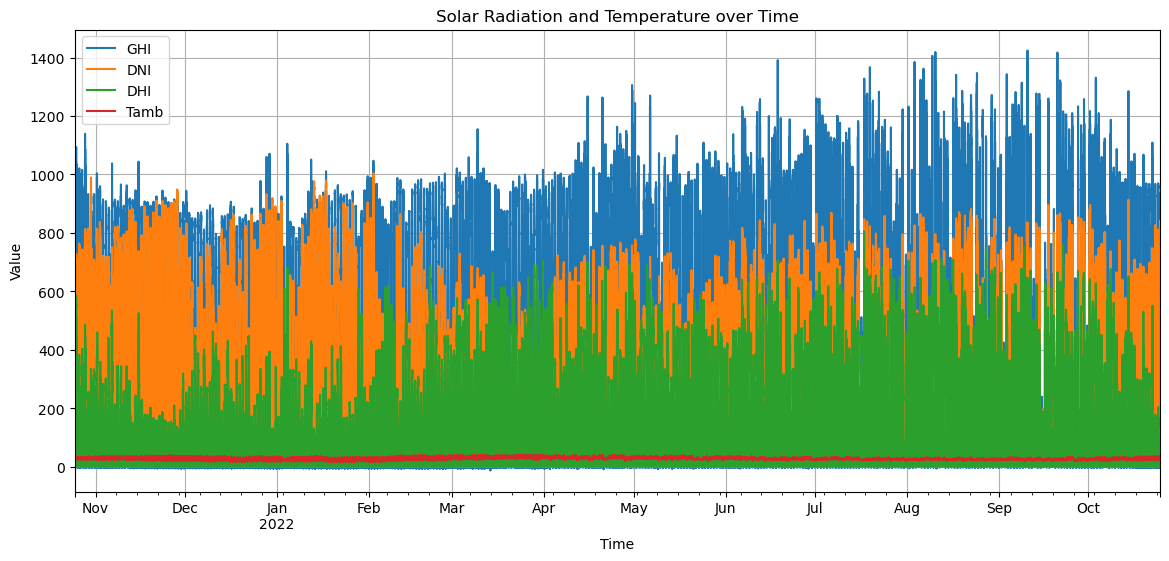

In [10]:
# 8. Line plot for solar radiation and temperature
togo_df[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(14,6))
plt.title("Solar Radiation and Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

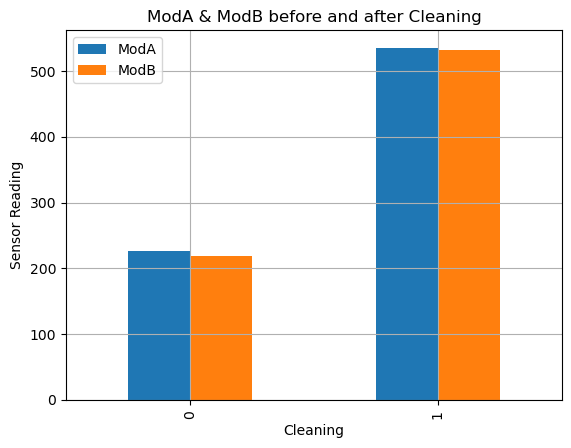

In [11]:
# 9. Average ModA & ModB grouped by Cleaning flag
togo_df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind='bar')
plt.title("ModA & ModB before and after Cleaning")
plt.ylabel("Sensor Reading")
plt.grid(True)
plt.show()

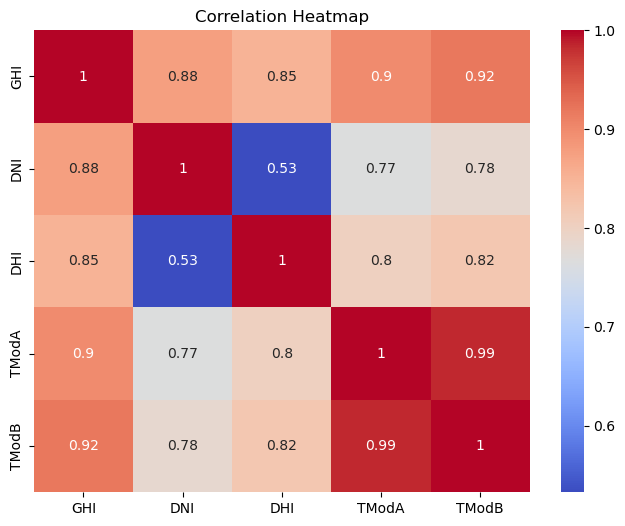

In [12]:
# 10. Correlation Heatmap for solar metrics and module temps
plt.figure(figsize=(8,6))
sns.heatmap(togo_df[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

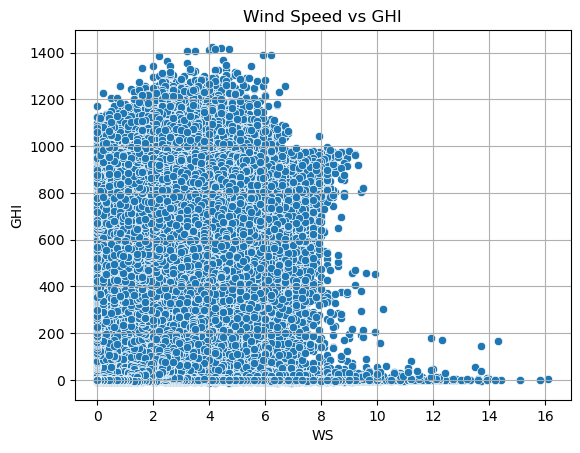

In [13]:
# 11. Scatter plot: Wind Speed vs GHI
sns.scatterplot(data=togo_df, x="WS", y="GHI")
plt.title("Wind Speed vs GHI")
plt.grid(True)
plt.show()

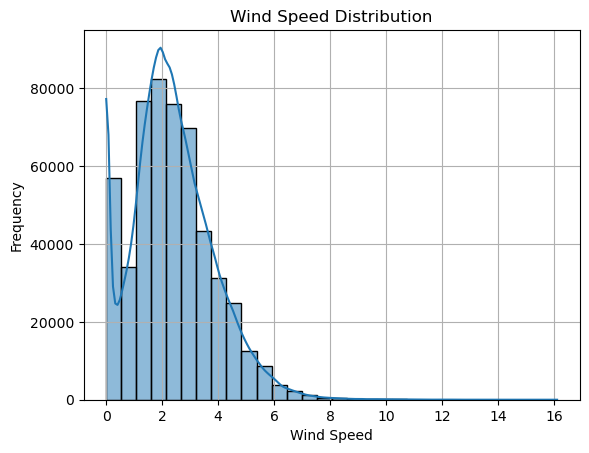

In [14]:
# 12. Histogram of Wind Speed
sns.histplot(togo_df["WS"], bins=30, kde=True)
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

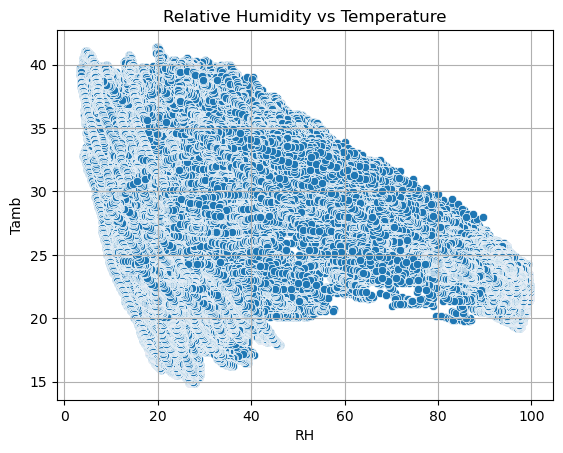

In [15]:
# 13. Scatter plot: Relative Humidity vs Temperature
sns.scatterplot(data=togo_df, x="RH", y="Tamb")
plt.title("Relative Humidity vs Temperature")
plt.grid(True)
plt.show()

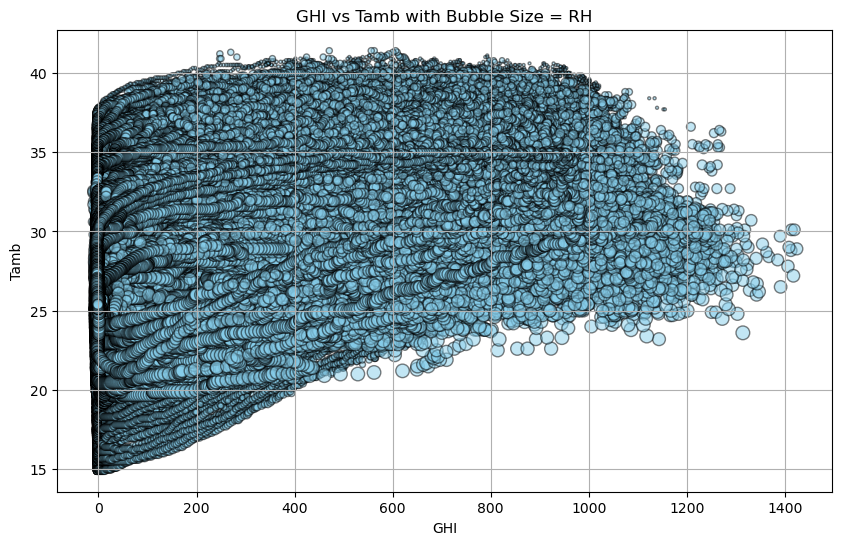

In [16]:
# 14. Bubble Chart: GHI vs Tamb with RH as bubble size
plt.figure(figsize=(10,6))
plt.scatter(togo_df['GHI'], togo_df['Tamb'], s=togo_df['RH'], alpha=0.5, c='skyblue', edgecolors='k')
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb with Bubble Size = RH")
plt.grid(True)
plt.show()